The dataset we will study refers to clients of a wholesale distributor. It contains information such as clients annual spend on fresh product, milk products, grocery products etc. Below is some more information an each feature:

FRESH: annual spending (m.u.) on fresh products (Continuous)
MILK: annual spending (m.u.) on milk products (Continuous)
GROCERY: annual spending (m.u.) on grocery products (Continuous)
FROZEN: annual spending (m.u.) on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.) on delicatessen products (Continuous)CHANNEL: customer channels - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customer regions - Lisnon, Oporto or Other (Nominal)

In [1]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\kumar.vishwesh\Music\KV\CV\NP\K means\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [6]:
data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [16]:
data.shape

(440, 11)

In [8]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

C:\Users\kumar.vishwesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [9]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

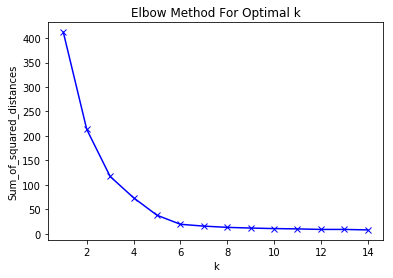

In [11]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 5

In [12]:
km = KMeans(n_clusters=5)
km = km.fit(data_transformed)

In [13]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
km.n_clusters

5

In [23]:
type(km.labels_)

numpy.ndarray

In [25]:
data['cluster']=km.labels_

In [27]:
data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1,0
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1,1
5,9413,8259,5126,666,1795,1451,0,1,0,0,1,1
6,12126,3199,6975,480,3140,545,0,1,0,0,1,1
7,7579,4956,9426,1669,3321,2566,0,1,0,0,1,1
8,5963,3648,6192,425,1716,750,1,0,0,0,1,0
9,6006,11093,18881,1159,7425,2098,0,1,0,0,1,1


In [29]:
data.cluster.value_counts()

0    211
1    105
2     59
4     37
3     28
Name: cluster, dtype: int64